# Morenny Rock Glacier Optical Imagery Example

## Download data from planet.com website

Create an Account or Log In: To access data, you generally need an account with https://www.planet.com . If you don't have one, you'll need to sign up. Otherwise, log in with your existing credentials.


![Step 1](./data/morenny/optical/planet_screenshot1.png)


## Import AkhDefo Packages.

In [9]:

#Functions for data preparations
import akhdefo_functions
from akhdefo_functions import akhdefo_download_planet
from akhdefo_functions import read_data_prep
from akhdefo_functions import move_files_with_string
from akhdefo_functions import Crop_to_AOI

#Functions data processing
from akhdefo_functions import scatter_area_mask
from akhdefo_functions import Raster_Correction
from akhdefo_functions import Optical_flow_akhdefo

#Functions for shapefile point data interpolation to raster geotif
#Function Autovariogram use Kriging method it fits the data to different variogram models and automatically use the best fit variogram model (Computationally Heavy but you can process data in chunks)
from akhdefo_functions import Auto_Variogram

# interpoate_xyz uses the following interpolation methods (nearest, linear and cubic)
from akhdefo_functions import interpolate_xyz

#Functions for data Visualization and Analysis
from akhdefo_functions import MeanProducts_plot_ts
from akhdefo_functions import plot_stackNetwork
from akhdefo_functions import akhdefo_viewer
from akhdefo_functions import akhdefo_dashApp

## Download Data using Planetlab API Account

In [ ]:

''' 

First Run the below command and make sure {download=False} to see list of available dataset. 

Its highly recommended to use data frame same path for the entire time-series for more accurate results
 
'''

#uncomment below to download data using planet lab api key

''' 
akhdefo_download_planet(planet_api_key='', AOI='./data/morenny/AOI.shp', start_date='May 1, 2018', end_date=' September 30 2022', limit=5, item_type='PSScene',
                        product_bundle='analytic_sr_udm2', 
                        clear_percent=90, cloud_filter=0.1,
                        output_folder='raw_data',
                        clip_flag=True, download_data=False

'''
# for this excecise we download data from planet labs explorer web application 
#Lets Navigate to the zip folder directory

import os

# Replace 'your_directory_path' with the path of your directory
zip_dir = './data/morenny/optical/zip_folder/'

# List all files and directories in the specified path
contents = os.listdir(zip_dir)

# Print the contents
for item in contents:
    print(item)
    
# The zip folder inside the zip folder directory inclue cropped planet lab imagery between 2018 to 2022. lets extract the data and look at the images

## Extract downloaded zip files

In [ ]:
#This functions extracts data from all the granuples zip directory.
read_data_prep(zip_dir=zip_dir,
                                 image_dir='./data/morenny/optical/image_dir', 
                                 ext_image_file='_SR_clip.tif', udm_mask_dir='./data/morenny/optical/udm_mask_dir', ext_udm_mask_file='udm2_clip.tif')

In [ ]:
# This function will move all the data from each granules subdir to a single folder
# move_files_with_string(source_dir='./data/morenny/optical/RS_dir_path129/', dest_dir='./data/morenny/optical/RS_path129', search_string='.tif')
# move_files_with_string(source_dir='./data/morenny/optical/scatter_dir/', dest_dir='./data/morenny/optical/scatter_rs', search_string='.tif')


In [ ]:

''' 
Crop all raster to Area of interest bounding box


'''
Crop_to_AOI(Path_to_WorkingDir='./data/morenny/optical/image_dir', 
                              Path_to_AOI_shapefile='./data/morenny/AOI.shp', 
                              output_CroppedDir='./data/morenny/optical/image_dir_aoi', file_ex='.tif')



## Preparing raster for optical flow and displacement calculation!

The data needs to be converted to "uint8" format and be calibrated and normalized.


In [ ]:
import warnings
warnings.filterwarnings("ignore")


Raster_Correction(input_path="./data/morenny/optical/image_dir_aoi", output_path="./data/morenny/optical/image_dir_aoi_filt", limit=None,
                                    lowpass_kernel_size=None, bilateral_win_size=7, bilateral_sigma_color=75,
                                    bilateral_sigma_spatial=75,
                                    clip_percentiles=[2, 98], optical=True, 
                                    scale=None, Vegetation_mask=None)

## Applying optical flow and producing time-series deformation products.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import akhdefo_functions
akhdefo_functions.Optical_flow_akhdefo(input_dir='./data/morenny/optical/image_dir_aoi_filt', output_dir='./data/morenny/optical/geo', AOI='./data/morenny/AOI.shp', zscore_threshold=2, 
                                       ssim_thresh=0.65, image_resolution='3.125m', interpolate='kriging', 
                                       show_figure=False, point_size=2, dem_path='./data/morenny/dem.tif', smoothing_kernel_size=2, 
                                       Vegetation_mask=None, VEL_scale='year', VEL_Mode='linear', good_match_option=0.75, 
                                       hillshade_option=True, shapefile_output=True, max_triplet_interval=300, pixel_size=10, num_chunks=10, overlap_percentage=0, pyr_scale=0.5, levels=15, 
                                       winsize=128, iterations=7, poly_n=7, poly_sigma=1.5,
                                       flags=1, master_reference='single', 
                                       selection_Mode='pair', start_date=None, end_date=None, krig_method='universal',spatial_ref=True, use_detrend=False)

Processing:   0%|          | 0/45 [00:00<?, ?it/s]

kriging succeed with Model: Stable and score: 0.9791992083364693
kriging succeed with Model: TPLSimple and score: 0.5267759844895336
kriging succeed with Model: Exponential and score: 0.7812111564853551


Processing:   2%|▏         | 1/45 [00:07<05:15,  7.17s/it]

kriging succeed with Model: Integral and score: 0.9641028602747252
kriging succeed with Model: Integral and score: 0.9622426357083942
kriging succeed with Model: Integral and score: 0.9545284629569499


Processing:   4%|▍         | 2/45 [00:21<08:00, 11.17s/it]

kriging succeed with Model: Rational and score: 0.9927471750966338
kriging succeed with Model: Matern and score: 0.9710124493087702
Error with model SuperSpherical: Internal Error.
kriging succeed with Model: SuperSpherical and score: 0.9618840749749992


Processing:   7%|▋         | 3/45 [00:27<06:23,  9.14s/it]

Error with model Spherical: Internal Error.
kriging succeed with Model: Spherical and score: 0.9856780787979611
kriging succeed with Model: Gaussian and score: 0.9450042644264276
Error with model TPLSimple: Internal Error.
kriging succeed with Model: TPLSimple and score: 0.990825639788675


Processing:   9%|▉         | 4/45 [00:34<05:36,  8.21s/it]

Error with model Rational: Internal Error.
kriging succeed with Model: Rational and score: 0.9878161815690972
kriging succeed with Model: TPLSimple and score: 0.9918066624672089
kriging succeed with Model: TPLSimple and score: 0.9875403967840275


Processing:  11%|█         | 5/45 [00:42<05:26,  8.16s/it]

kriging succeed with Model: HyperSpherical and score: 0.9434339960231475
kriging succeed with Model: TPLSimple and score: 0.992132800316453
kriging succeed with Model: HyperSpherical and score: 0.944017850345661


Processing:  16%|█▌        | 7/45 [00:49<03:21,  5.30s/it]

Skipping computation for 20180903 to 20190705 as the time interval is larger than 300 days.
kriging succeed with Model: TPLSimple and score: 0.450994899261162
kriging succeed with Model: Integral and score: 0.9950117755226444
kriging succeed with Model: Gaussian and score: 0.48919465083037017


Processing:  18%|█▊        | 8/45 [01:12<06:40, 10.84s/it]

Error with model Cubic: Internal Error.
kriging succeed with Model: Cubic and score: 0.8528757533080602
Error with model Gaussian: Internal Error.
kriging succeed with Model: Gaussian and score: 0.8618766825303152
kriging succeed with Model: Cubic and score: 0.8518328872861385


Processing:  20%|██        | 9/45 [01:29<07:41, 12.82s/it]

Error with model Integral: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: Stable and score: 0.9070778779391051
Error with model TPLSimple: Internal Error.
kriging succeed with Model: TPLSimple and score: 0.96607794402929
kriging succeed with Model: TPLSimple and score: 0.6988945259476075


Processing:  22%|██▏       | 10/45 [01:45<07:55, 13.60s/it]

kriging succeed with Model: Rational and score: 0.9832694917360202
kriging succeed with Model: SuperSpherical and score: 0.9681793816662884
kriging succeed with Model: SuperSpherical and score: 0.9433838513142188


Processing:  24%|██▍       | 11/45 [01:54<06:59, 12.34s/it]

kriging succeed with Model: Cubic and score: 0.7103970854100972
kriging succeed with Model: Cubic and score: 0.9748606346165783
kriging succeed with Model: SuperSpherical and score: 0.9872968566880777


Processing:  27%|██▋       | 12/45 [02:02<06:01, 10.96s/it]

kriging succeed with Model: TPLSimple and score: 0.9652726560450958
kriging succeed with Model: TPLSimple and score: 0.8969949699462574
kriging succeed with Model: Cubic and score: 0.9380633363024538


Processing:  31%|███       | 14/45 [02:08<03:27,  6.69s/it]

Skipping computation for 20190825 to 20200621 as the time interval is larger than 300 days.
kriging succeed with Model: JBessel and score: 0.9796263178794589
kriging succeed with Model: TPLSimple and score: 0.9640732186919453
kriging succeed with Model: Stable and score: 0.9773827375200028


Processing:  33%|███▎      | 15/45 [02:17<03:37,  7.26s/it]

kriging succeed with Model: SuperSpherical and score: 0.847992830124622
kriging succeed with Model: SuperSpherical and score: 0.94249813184123
kriging succeed with Model: JBessel and score: -0.0023793203894160175


Processing:  36%|███▌      | 16/45 [02:22<03:12,  6.65s/it]

Error with model Integral: Internal Error.
kriging succeed with Model: Integral and score: 0.9938169838689873
Error with model Matern: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Error with model Matern: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: Matern and score: 0.9973358723321417
kriging succeed with Model: TPLSimple and score: 0.9951037037506683


Processing:  38%|███▊      | 17/45 [02:33<03:44,  8.03s/it]

Error with model Gaussian: Internal Error.
kriging succeed with Model: Gaussian and score: 0.9833783346489032
kriging succeed with Model: Stable and score: 0.9885443001860158
kriging succeed with Model: TPLSimple and score: 0.9893587247936156


Processing:  40%|████      | 18/45 [02:40<03:24,  7.58s/it]

kriging succeed with Model: JBessel and score: 0.28415010758460413
kriging succeed with Model: JBessel and score: 0.783990673094989
Error with model JBessel: Internal Error.
Error with model Exponential: Internal Error.
Error with model JBessel: Internal Error.
kriging succeed with Model: JBessel and score: 0.25778471532971814


Processing:  42%|████▏     | 19/45 [02:55<04:17,  9.89s/it]

kriging succeed with Model: Stable and score: 0.9551344762833551
kriging succeed with Model: Integral and score: 0.9603428741673838
Error with model Integral: Internal Error.
kriging succeed with Model: Integral and score: 0.9379492238704356


Processing:  44%|████▍     | 20/45 [03:12<04:57, 11.89s/it]

kriging succeed with Model: Matern and score: 0.9108231819439266
Error with model Integral: Internal Error.
kriging succeed with Model: Integral and score: 0.9841745681187271
Error with model Integral: Internal Error.
kriging succeed with Model: Integral and score: 0.9031259763903465


Processing:  47%|████▋     | 21/45 [03:28<05:16, 13.19s/it]

kriging succeed with Model: Integral and score: 0.8950705621053872
kriging succeed with Model: TPLSimple and score: 0.9687301931807815
kriging succeed with Model: Exponential and score: 0.6981486329932485


Processing:  49%|████▉     | 22/45 [03:39<04:49, 12.59s/it]

Error with model JBessel: Internal Error.
kriging succeed with Model: JBessel and score: 0.46393859731975606
kriging succeed with Model: JBessel and score: 0.5754221072990205
Error with model JBessel: Internal Error.
kriging succeed with Model: JBessel and score: 0.05025783597001443


Processing:  51%|█████     | 23/45 [03:48<04:13, 11.54s/it]

kriging succeed with Model: Cubic and score: 0.9939773439712318
kriging succeed with Model: TPLSimple and score: 0.9921320744075774
kriging succeed with Model: TPLSimple and score: 0.9905374090392318


Processing:  53%|█████▎    | 24/45 [03:53<03:22,  9.66s/it]

kriging succeed with Model: SuperSpherical and score: 0.9320480422900277
kriging succeed with Model: Rational and score: 0.9200385402520124
kriging succeed with Model: JBessel and score: 0.9720095582541814


Processing:  56%|█████▌    | 25/45 [04:03<03:11,  9.56s/it]

kriging succeed with Model: Stable and score: 0.9836459211272734
Error with model Cubic: Internal Error.
kriging succeed with Model: Cubic and score: 0.9585963215753377
kriging succeed with Model: TPLSimple and score: 0.9675994597813767


Processing:  58%|█████▊    | 26/45 [04:08<02:36,  8.25s/it]

kriging succeed with Model: Rational and score: 0.9864878083571994
Error with model Stable: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Error with model Stable: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Error with model Stable: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: Exponential and score: 0.9716404934498474
kriging succeed with Model: Integral and score: 0.9568170835101406


Processing:  60%|██████    | 27/45 [04:19<02:44,  9.15s/it]

kriging succeed with Model: Rational and score: 0.9880337251876893
kriging succeed with Model: SuperSpherical and score: 0.7861950656910626
kriging succeed with Model: Cubic and score: 0.6808713995607107


Processing:  62%|██████▏   | 28/45 [04:26<02:23,  8.42s/it]

kriging succeed with Model: SuperSpherical and score: 0.8537436474687984
kriging succeed with Model: Exponential and score: 0.9784368685451477
kriging succeed with Model: SuperSpherical and score: 0.9206573770865318


Processing:  64%|██████▍   | 29/45 [04:33<02:10,  8.14s/it]

kriging succeed with Model: Matern and score: 0.8828922764968392
kriging succeed with Model: Stable and score: 0.9970121629513301
kriging succeed with Model: Integral and score: 0.961170590483919


Processing:  67%|██████▋   | 30/45 [04:48<02:30, 10.05s/it]

kriging succeed with Model: Integral and score: 0.9552088775779061
kriging succeed with Model: HyperSpherical and score: 0.9859039605253794
kriging succeed with Model: Cubic and score: 0.7770394625181489


Processing:  69%|██████▉   | 31/45 [04:59<02:24, 10.34s/it]

kriging succeed with Model: SuperSpherical and score: 0.9980250508336774
Error with model Matern: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: JBessel and score: 0.9995651646641484
Error with model Matern: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Error with model JBessel: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: JBessel and score: 0.9987961552663235


Processing:  71%|███████   | 32/45 [05:16<02:40, 12.33s/it]

kriging succeed with Model: JBessel and score: 0.4869452938537907
Error with model JBessel: Internal Error.
kriging succeed with Model: JBessel and score: 0.5692837823557952
Error with model JBessel: Internal Error.
kriging succeed with Model: JBessel and score: -0.046559171917590625


Processing:  73%|███████▎  | 33/45 [05:24<02:12, 11.08s/it]

kriging succeed with Model: Stable and score: 0.9617882587397941
kriging succeed with Model: JBessel and score: 0.9699642274108903
kriging succeed with Model: Rational and score: 0.8990189787470931


Processing:  76%|███████▌  | 34/45 [05:32<01:51, 10.13s/it]

kriging succeed with Model: Matern and score: 0.8560730475653227
kriging succeed with Model: Matern and score: 0.4903127950779018
Error with model Cubic: Internal Error.
kriging succeed with Model: Cubic and score: 0.7667422835854861


Processing:  78%|███████▊  | 35/45 [05:39<01:31,  9.19s/it]

kriging succeed with Model: Cubic and score: 0.9980772880612458
kriging succeed with Model: JBessel and score: 0.9963862677650953
kriging succeed with Model: JBessel and score: 0.9958887368071039


Processing:  80%|████████  | 36/45 [05:50<01:28,  9.86s/it]

kriging succeed with Model: Integral and score: 0.9977824982306611
kriging succeed with Model: Stable and score: 0.9967032837555823
kriging succeed with Model: Stable and score: 0.9964019274264101


Processing:  82%|████████▏ | 37/45 [06:01<01:21, 10.20s/it]

kriging succeed with Model: Rational and score: 0.8809793911338909
kriging succeed with Model: JBessel and score: 0.8981156497602789
Error with model Cubic: Internal Error.
kriging succeed with Model: Cubic and score: 0.4653720156751405


Processing:  84%|████████▍ | 38/45 [06:12<01:11, 10.27s/it]

kriging succeed with Model: TPLSimple and score: 0.9937539112536439
kriging succeed with Model: JBessel and score: 0.9790099968698907
kriging succeed with Model: JBessel and score: 0.9716084075170688


Processing:  87%|████████▋ | 39/45 [06:24<01:04, 10.81s/it]

Error with model Matern: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: Stable and score: 0.9784687584995142
kriging succeed with Model: Stable and score: 0.9821859290452799
Error with model Stable: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: Stable and score: 0.9910827022658706


Processing:  89%|████████▉ | 40/45 [06:33<00:51, 10.28s/it]

kriging succeed with Model: Spherical and score: 0.7506893104996054
kriging succeed with Model: JBessel and score: 0.9835098216895457
kriging succeed with Model: SuperSpherical and score: 0.3957561145421967


Processing:  91%|█████████ | 41/45 [06:45<00:43, 10.94s/it]

kriging succeed with Model: TPLSimple and score: 0.973896935458593
kriging succeed with Model: Cubic and score: 0.8704001186665697
kriging succeed with Model: JBessel and score: 0.856971106501883


Processing:  93%|█████████▎| 42/45 [06:58<00:34, 11.60s/it]

Error with model Rational: Internal Error.
kriging succeed with Model: Rational and score: 0.8984632476772814
Error with model Stable: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: Stable and score: 0.9706214920799016
Error with model Stable: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: Stable and score: 0.962438556040592


Processing:  96%|█████████▌| 43/45 [07:07<00:21, 10.69s/it]

kriging succeed with Model: Matern and score: 0.9783118393308438
kriging succeed with Model: Integral and score: 0.9732449481721028
kriging succeed with Model: Stable and score: 0.9723756743374561


Processing:  98%|█████████▊| 44/45 [07:19<00:10, 10.92s/it]

kriging succeed with Model: Stable and score: 0.9980830101622193
Error with model Matern: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: JBessel and score: 0.9958036755832749
Error with model Matern: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: SuperSpherical and score: 0.9950960111392609


Processing: 100%|██████████| 45/45 [07:39<00:00, 10.21s/it]


Wait for processing to complete writing data into shapefile for timeseries...


Processing: Update Shapefiles :   0%|          | 0/3 [00:00<?, ?it/s]

processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_2DVEL.shp started...  

1943


Processing: Update Shapefiles :  33%|███▎      | 1/3 [03:04<06:09, 184.91s/it]

ReferencePoint x, y: (662260.6534194946, 4761807.147949219), VEL, VEL_STD: (0.15668011764698356, 0.011860899052458698)
processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_2DVEL.shp completed...  

processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_N.shp started...  

1943


Processing: Update Shapefiles :  67%|██████▋   | 2/3 [06:07<03:03, 183.31s/it]

ReferencePoint x, y: (662260.6534194946, 4761807.147949219), VEL, VEL_STD: (0.06346101230391123, 0.007452514319404312)
processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_N.shp completed...  

processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_E.shp started...  

1943


Processing: Update Shapefiles : 100%|██████████| 3/3 [09:12<00:00, 184.20s/it]

ReferencePoint x, y: (662260.6534194946, 4761807.147949219), VEL, VEL_STD: (-0.0945266383122991, 0.012143612225367867)
processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_E.shp completed...  

Total Days: 1552
file used ./data/morenny/optical/geo/temp_shapefile_dir\updated_shapefiles\20180627_20220926_20220926_2DVEL.shp.xml


start calculating aspect...
calculating aspect completed


In [2]:
import akhdefo_functions
from akhdefo_functions import Auto_Variogram

Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_N.shp', column_attribute='VEL'
               , pixel_size=20, num_chunks=10, out_fileName='N', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=2, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal')


Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_E.shp', column_attribute='VEL'
               , pixel_size=20, num_chunks=10, out_fileName='E', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=2, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal')



Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp', column_attribute='VEL'
               , pixel_size=20, num_chunks=10, out_fileName='2DVEL', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=2, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal')



Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp', column_attribute='aspect'
               , pixel_size=20, num_chunks=10, out_fileName='aspect_test', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=2, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal', detrend_data=True)

kriging succeed with Model: Integral and score: 0.9905358374987387
kriging succeed with Model: Rational and score: 0.9948879745802939
kriging succeed with Model: Rational and score: 0.9685939316374813
kriging succeed with Model: Exponential and score: 0.9831770607858743


array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan, 170.32584406, 171.62777321, ...,          nan,
                 nan,          nan],
       [         nan,          nan, 171.50076609, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

## Visualize Displacement Products

In [5]:
akhdefo_functions.calculate_and_save_aspect_raster(ew_raster_path= './data/morenny/optical/VEL_Folder/E.tif', ns_raster_path= './data/morenny/optical/VEL_Folder/N.tif',
                                 output_raster_path= './data/morenny/optical/VEL_Folder/aspect.tif')

* Lets plot Annual Linear velocity in merter/year overlayed by detrended vector motion.
* Zero value of the aspect colorbar represents True North, Negative west and Positive is East. for instance -40 is equal direction of movement North 40 degree towards west (40NW)

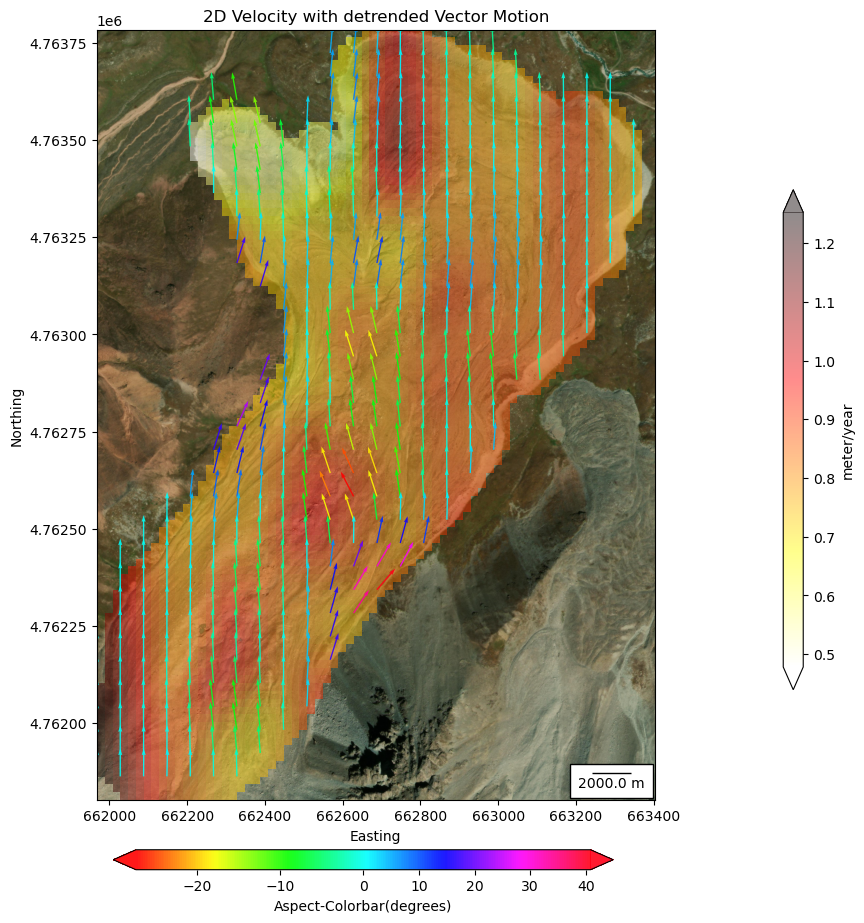

In [3]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/morenny/basemap.tif', raster_file='./data/morenny/optical/VEL_Folder/2DVEL.tif', output_folder='./data/morenny/optical/Figs_analysis/',
                                 title='2D Velocity with detrended Vector Motion', 
                   pixel_resolution_meters=None, output_file_name="2DVEL_WithVectorMotion_detrend.png", 
                   alpha=0.9, unit_conversion=None, no_data_mask=True, 
                   colormap='hot_r'
                   , min_value=None, max_value=None, 
                   normalize=True, colorbar_label='meter/year',
                   show_figure=True, aspect_raster='./data/morenny/optical/VEL_Folder/aspect_test_simple_detrend.tif', cmap_aspect='hsv' , step=2)

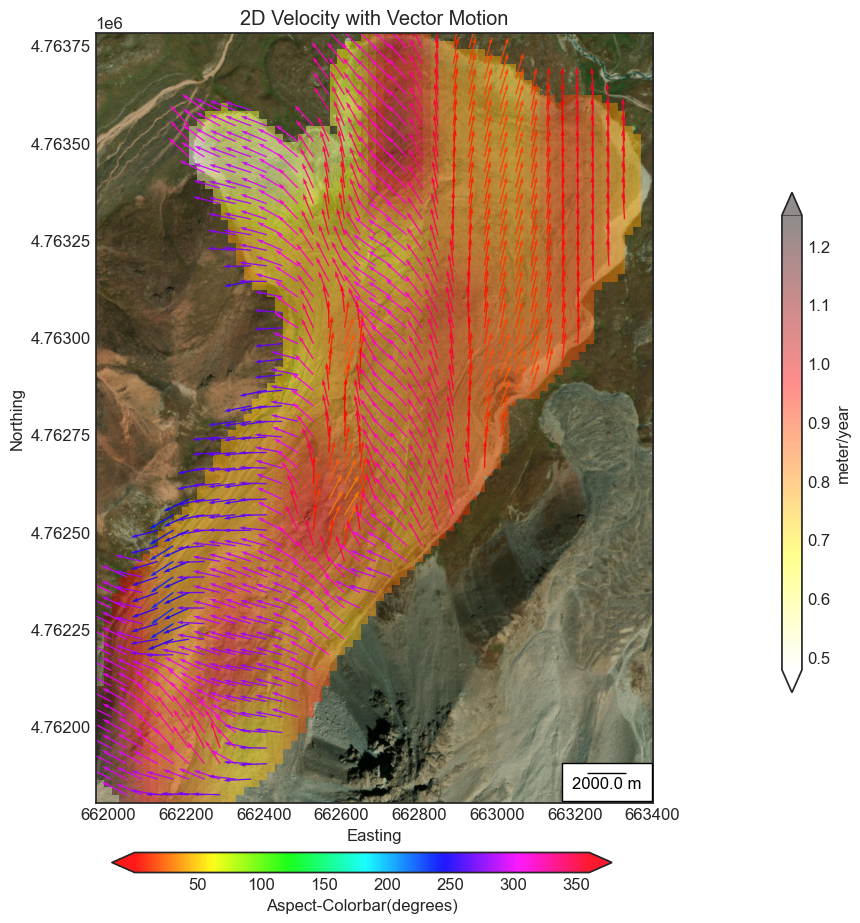

In [5]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/morenny/basemap.tif', raster_file='./data/morenny/optical/VEL_Folder/2DVEL.tif', output_folder='./data/morenny/optical/Figs_analysis/',
                                 title='2D Velocity with Vector Motion', 
                   pixel_resolution_meters=None, output_file_name="2DVEL_WithVectorMotion.png", 
                   alpha=0.9, unit_conversion=None, no_data_mask=True, 
                   colormap='hot_r'
                   , min_value=None, max_value=None, 
                   normalize=True, colorbar_label='meter/year',
                   show_figure=True, aspect_raster='./data/morenny/optical/VEL_Folder/aspect.tif', cmap_aspect='hsv' , step=2)

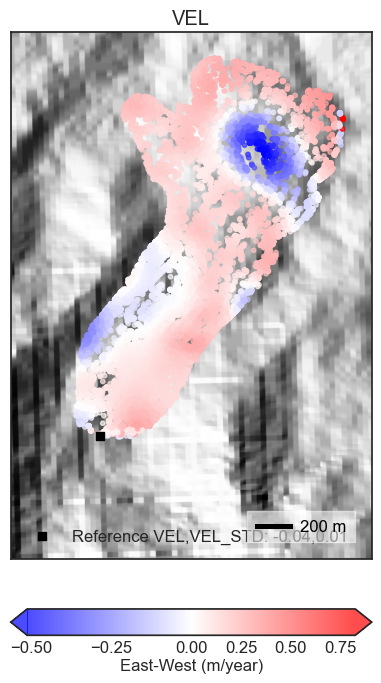

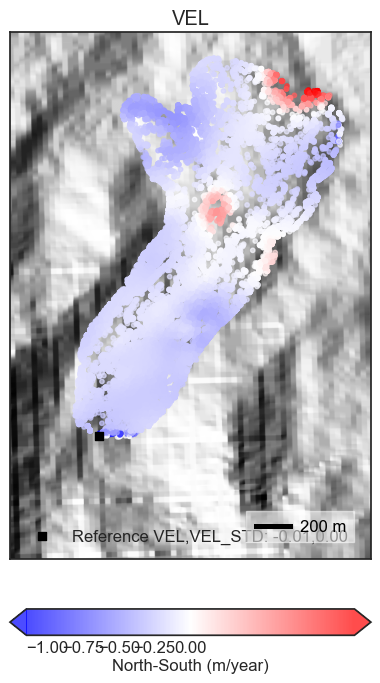

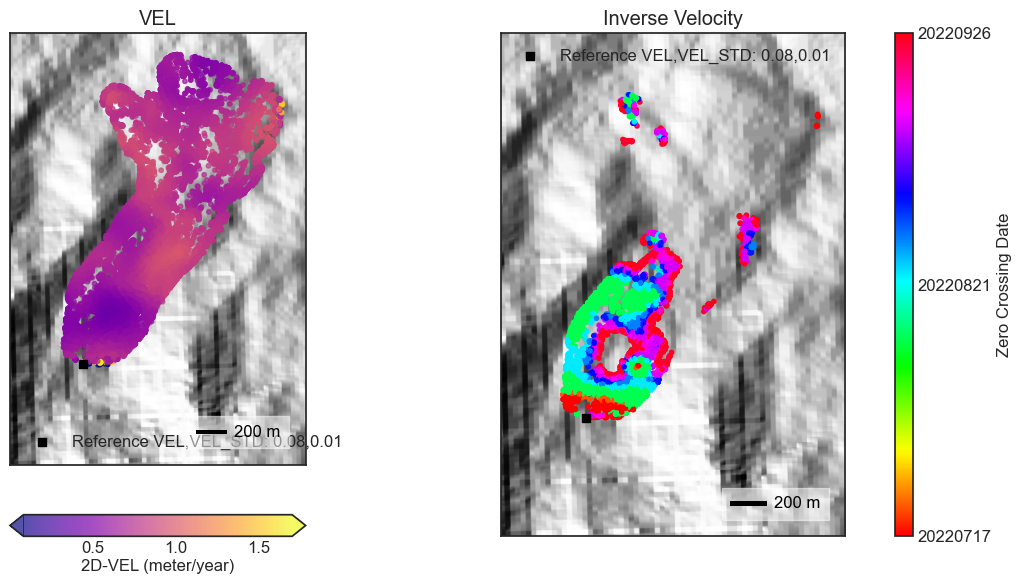

In [6]:
#Visualize Mean Velocity East-West
# if set batch_plot=True it will plot static time series figure for each date acquisition 
import akhdefo_functions
akhdefo_functions.MeanProducts_plot_ts(path_to_shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_E.shp', 
                                       dem_path='./data/morenny/dem.tif', out_folder='./data/morenny/optical/Figs_analysis/E', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 1.5], opacity=0.7,
                                       cmap='bwr', point_size=10, 
                                       cbar_label='East-West (m/year)', 
                                       batch_plot=False)

#Visualize Mean Velocity North-South
akhdefo_functions.MeanProducts_plot_ts(path_to_shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_N.shp', 
                                       dem_path='./data/morenny/dem.tif', out_folder='./data/morenny/optical/Figs_analysis/N', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 1.5], opacity=0.7,
                                       cmap='bwr', point_size=10, 
                                       cbar_label='North-South (m/year)', 
                                       batch_plot=False)

#Visualize Mean Velocity 2D Velocity 
akhdefo_functions.MeanProducts_plot_ts(path_to_shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp', 
                                       dem_path='./data/morenny/dem.tif', out_folder='./data/morenny/optical/Figs_analysis/2D', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 1.5], opacity=0.7,
                                       cmap='plasma', point_size=10, 
                                       cbar_label='2D-VEL (meter/year)', 
                                       batch_plot=False, plot_inverse_Vel=True)

## Interactive Time Series Analysis in a Dash Web App

This plot is part of an interactive web application. Users have the ability to select groups of data points using either the box select or lasso tool, which are superimposed on a satellite image base map. The selected data will then be reflected in the time series chart. Additionally, users can customize the axis labels to suit their dataset; for example, if the dataset measures displacement or velocity in meters, the y-axis label can be adjusted accordingly from the default mm. Furthermore, users can download their analysis and the generated figures directly from the web application.


![Step 1](./data/morenny/optical/dash2d1.png)

![dash2d_optical output sample1](./data/morenny/optical/newplot10.png)

![dash2d_optical output sample2](./data/morenny/optical/newplot9.png)

In [5]:
import akhdefo_functions

akhdefo_functions.akhdefo_dashApp(
Path_to_Shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp',
                                  port=8047, BaseMap=True, basemap_type='image')

In [ ]:

akhdefo_dashApp(
Path_to_Shapefile='../data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_N.shp',
                                  port=8056, BaseMap=True, basemap_type='image')

In [ ]:

akhdefo_dashApp(
Path_to_Shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_E.shp',
                                  port=8055, BaseMap=True, basemap_type='image')